# Learning PyTorch

The Basics

In [1]:
import torch

# Creating 
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print (x*y)


tensor([10.,  3.])


In [2]:
x = torch.zeros([2,5])

In [3]:
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [4]:
x.shape

torch.Size([2, 5])

In [5]:
y = torch.rand([2,5])

In [6]:
y

tensor([[0.4451, 0.5097, 0.5191, 0.4358, 0.9385],
        [0.7873, 0.6845, 0.3203, 0.2736, 0.5015]])

In [7]:
# Reshing in PyTorch
y.view([1,10])

tensor([[0.4451, 0.5097, 0.5191, 0.4358, 0.9385, 0.7873, 0.6845, 0.3203, 0.2736,
         0.5015]])

In [8]:
y

tensor([[0.4451, 0.5097, 0.5191, 0.4358, 0.9385],
        [0.7873, 0.6845, 0.3203, 0.2736, 0.5015]])

In [9]:
y = y.view([1,10])

In [10]:
y

tensor([[0.4451, 0.5097, 0.5191, 0.4358, 0.9385, 0.7873, 0.6845, 0.3203, 0.2736,
         0.5015]])

# Working with Data

In [13]:
# Load Libraries

import torch
import torchvision
from torchvision import transforms, datasets

# pip install torchvision

Trains and Test Data
+ MNIST is a hand drawn numbers dataset from 0 to 9

In [15]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/Users/qibili/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Define train and test datasets

In [17]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

Iterating over the data

In [19]:
for data in trainset:
    print(data)
    break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

In [20]:
x, y = data[0][0], data[1][0]

print(y)

tensor(9)


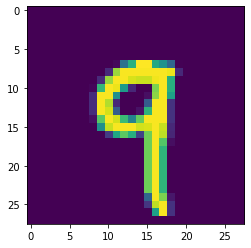

In [28]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [23]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


Checking if dataset is balanced

In [53]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1

print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [54]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")
    

ZeroDivisionError: division by zero

# Building a Neural Network

In [55]:
import torch.nn as nn
import torch.nn.functional as F

In [57]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1 )
        
        

        return x
        
net = Net()
print(net)        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [69]:
X = torch.rand((28,28))
X= X.view(-1,28*28)

In [70]:
output = net(X)

In [71]:
output

tensor([[-2.2561, -2.4303, -2.3324, -2.3014, -2.2306, -2.3041, -2.2655, -2.2829,
         -2.3704, -2.2680]], grad_fn=<LogSoftmaxBackward>)

# Training the model

In [74]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)


EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch for featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    
    


tensor(0.1104, grad_fn=<NllLossBackward>)
tensor(0.0527, grad_fn=<NllLossBackward>)
tensor(0.0943, grad_fn=<NllLossBackward>)


In [76]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
                
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


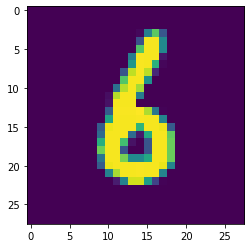

In [87]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()


In [88]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(6)
